# Перцептрон
## Цель работы
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

## Содержание работы
1. Сгенерируйте данные и обучите на них модель перцептрона.
2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте данные и обучите на них модель перцептрона.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

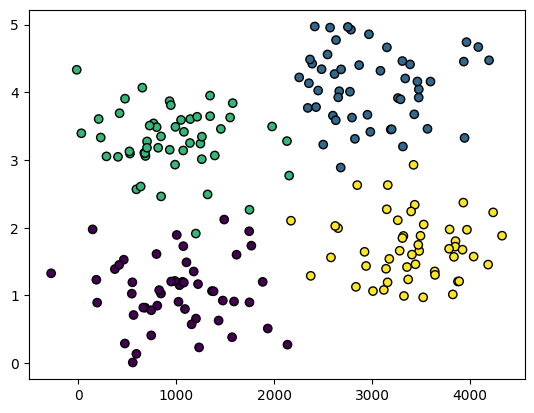

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

### 2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [7]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [8]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [9]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

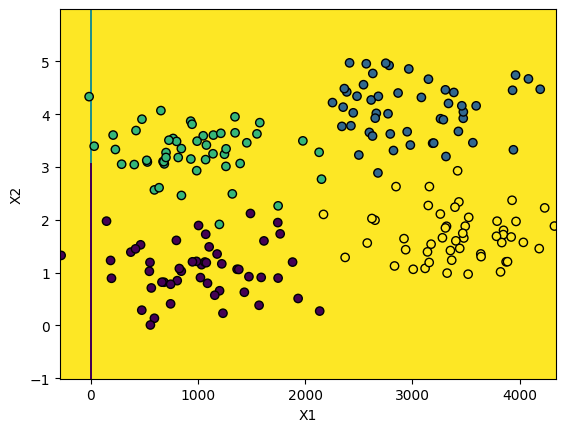

In [10]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Нормализуем данные в стандартные значения

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
X_scaled = scaler.transform(X)

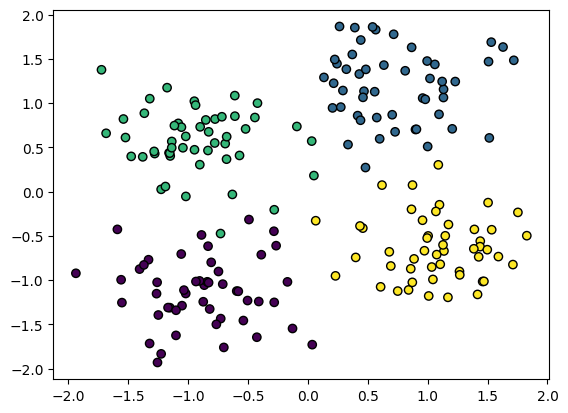

In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

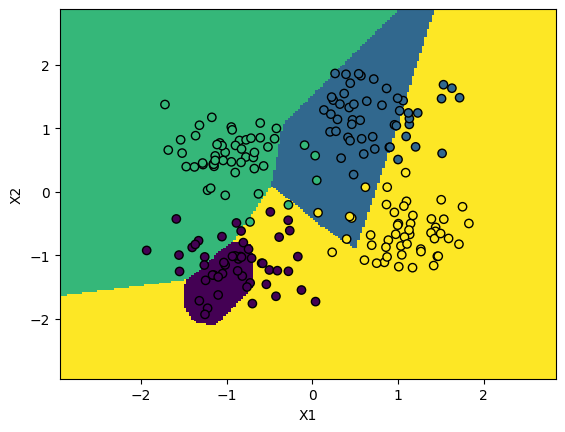

In [17]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.45881337
Iteration 2, loss = 1.45490172
Iteration 3, loss = 1.45100869
Iteration 4, loss = 1.44713621
Iteration 5, loss = 1.44329314
Iteration 6, loss = 1.43946441
Iteration 7, loss = 1.43564937
Iteration 8, loss = 1.43185535
Iteration 9, loss = 1.42808510
Iteration 10, loss = 1.42432918
Iteration 11, loss = 1.42058752
Iteration 12, loss = 1.41686572
Iteration 13, loss = 1.41316937
Iteration 14, loss = 1.40949804
Iteration 15, loss = 1.40585210
Iteration 16, loss = 1.40221865
Iteration 17, loss = 1.39861014
Iteration 18, loss = 1.39502042
Iteration 19, loss = 1.39144574
Iteration 20, loss = 1.38788633
Iteration 21, loss = 1.38434222
Iteration 22, loss = 1.38081334
Iteration 23, loss = 1.37730848
Iteration 24, loss = 1.37381236
Iteration 25, loss = 1.37033153
Iteration 26, loss = 1.36686458
Iteration 27, loss = 1.36341198
Iteration 28, loss = 1.35997407
Iteration 29, loss = 1.35655082
Iteration 30, loss = 1.35313136
Iteration 31, loss = 1.34972873
Iteration 32, los

In [19]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 2,  1, 47,  0],
       [ 0,  1,  0, 49]])

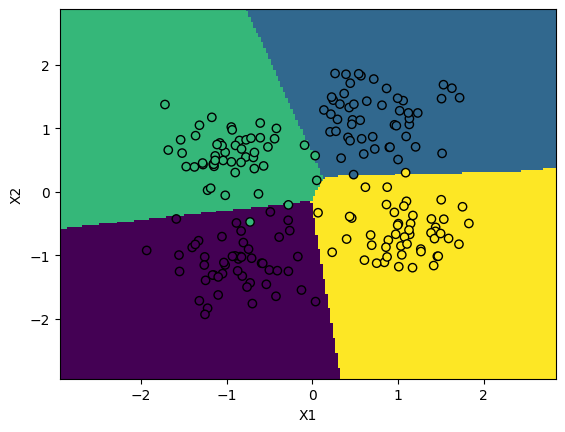

In [20]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10_000).fit(X_scaled, y)

In [22]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

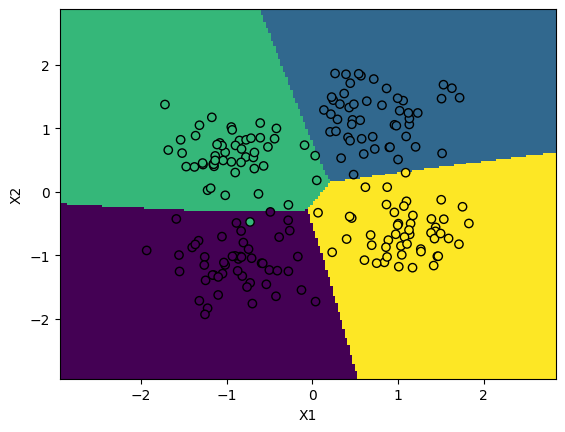

In [23]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задания для самостоятельного выполнения

### 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

#### Перцептрон с 1им нейроном

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.73990489
Iteration 2, loss = 1.73809796
Iteration 3, loss = 1.73629577
Iteration 4, loss = 1.73449841
Iteration 5, loss = 1.73270594
Iteration 6, loss = 1.73091844
Iteration 7, loss = 1.72913599
Iteration 8, loss = 1.72735866
Iteration 9, loss = 1.72558652
Iteration 10, loss = 1.72381964
Iteration 11, loss = 1.72205807
Iteration 12, loss = 1.72030189
Iteration 13, loss = 1.71855116
Iteration 14, loss = 1.71680593
Iteration 15, loss = 1.71506626
Iteration 16, loss = 1.71333220
Iteration 17, loss = 1.71160381
Iteration 18, loss = 1.70988114
Iteration 19, loss = 1.70816422
Iteration 20, loss = 1.70645310
Iteration 21, loss = 1.70474782
Iteration 22, loss = 1.70304842
Iteration 23, loss = 1.70135494
Iteration 24, loss = 1.69966740
Iteration 25, loss = 1.69798583
Iteration 26, loss = 1.69631027
Iteration 27, loss = 1.69464073
Iteration 28, loss = 1.69297724
Iteration 29, loss = 1.69131982
Iteration 30, loss = 1.68966848
Iteration 31, loss = 1.68802325
Iteration 32, los

In [25]:
confusion_matrix(y, clf.predict(X_scaled))

array([[45,  3,  2,  0],
       [ 0, 31,  0, 19],
       [47,  2,  1,  0],
       [ 0,  8,  0, 42]])

In [26]:
clf.score(X_scaled, y)

0.595

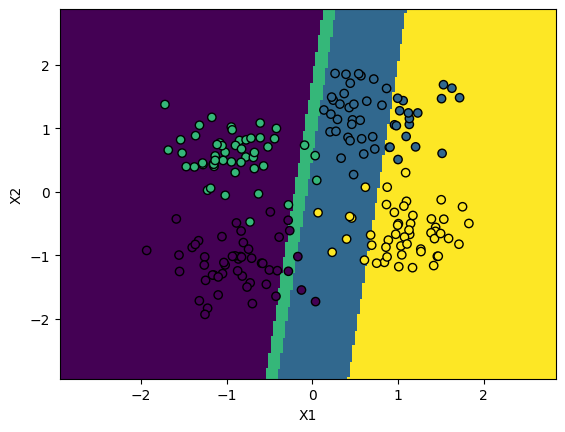

In [27]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон с 2мя нейронами

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 2.02371809
Iteration 2, loss = 2.02048841
Iteration 3, loss = 2.01726686
Iteration 4, loss = 2.01405359
Iteration 5, loss = 2.01084873
Iteration 6, loss = 2.00765240
Iteration 7, loss = 2.00446475
Iteration 8, loss = 2.00128589
Iteration 9, loss = 1.99811594
Iteration 10, loss = 1.99495504
Iteration 11, loss = 1.99180328
Iteration 12, loss = 1.98866078
Iteration 13, loss = 1.98552765
Iteration 14, loss = 1.98240398
Iteration 15, loss = 1.97928987
Iteration 16, loss = 1.97618541
Iteration 17, loss = 1.97309069
Iteration 18, loss = 1.97000579
Iteration 19, loss = 1.96693077
Iteration 20, loss = 1.96386572
Iteration 21, loss = 1.96081070
Iteration 22, loss = 1.95776576
Iteration 23, loss = 1.95473264
Iteration 24, loss = 1.95171227
Iteration 25, loss = 1.94870231
Iteration 26, loss = 1.94570276
Iteration 27, loss = 1.94271364
Iteration 28, loss = 1.93973495
Iteration 29, loss = 1.93676668
Iteration 30, loss = 1.93380884
Iteration 31, loss = 1.93086144
Iteration 32, los

In [29]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 49,  0,  1],
       [ 2,  2, 45,  1],
       [ 1,  1,  0, 48]])

In [30]:
clf.score(X_scaled, y)

0.96

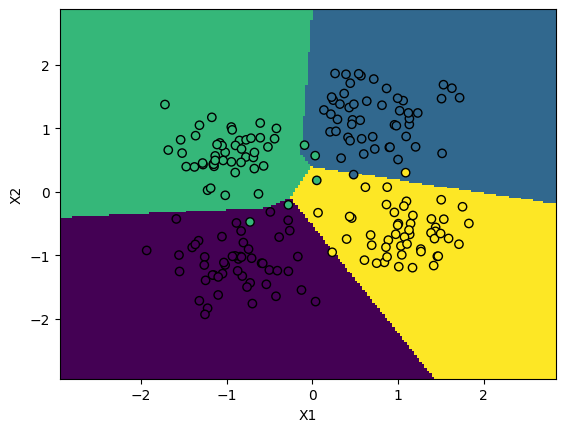

In [31]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон со 100 нейронами

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.49458904
Iteration 2, loss = 1.48062823
Iteration 3, loss = 1.46676305
Iteration 4, loss = 1.45299370
Iteration 5, loss = 1.43933531
Iteration 6, loss = 1.42578894
Iteration 7, loss = 1.41233415
Iteration 8, loss = 1.39897993
Iteration 9, loss = 1.38571015
Iteration 10, loss = 1.37251292
Iteration 11, loss = 1.35939758
Iteration 12, loss = 1.34636826
Iteration 13, loss = 1.33342718
Iteration 14, loss = 1.32056734
Iteration 15, loss = 1.30777621
Iteration 16, loss = 1.29507424
Iteration 17, loss = 1.28244817
Iteration 18, loss = 1.26990286
Iteration 19, loss = 1.25742994
Iteration 20, loss = 1.24502945
Iteration 21, loss = 1.23269931
Iteration 22, loss = 1.22043025
Iteration 23, loss = 1.20821922
Iteration 24, loss = 1.19606244
Iteration 25, loss = 1.18395925
Iteration 26, loss = 1.17190118
Iteration 27, loss = 1.15990895
Iteration 28, loss = 1.14797231
Iteration 29, loss = 1.13608109
Iteration 30, loss = 1.12424189
Iteration 31, loss = 1.11244514
Iteration 32, los

In [33]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [34]:
clf.score(X_scaled, y)

0.995

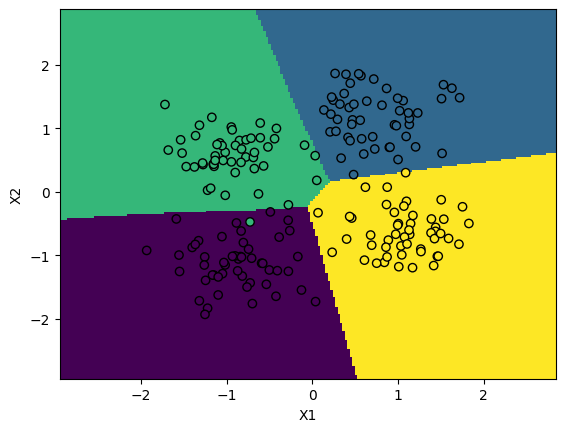

In [35]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

#### 2 скрытых слоя

In [36]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 2.01653279
Iteration 2, loss = 2.00242370
Iteration 3, loss = 1.98839412
Iteration 4, loss = 1.97445360
Iteration 5, loss = 1.96062014
Iteration 6, loss = 1.94688248
Iteration 7, loss = 1.93325582
Iteration 8, loss = 1.91974581
Iteration 9, loss = 1.90633199
Iteration 10, loss = 1.89301145
Iteration 11, loss = 1.87978720
Iteration 12, loss = 1.86667581
Iteration 13, loss = 1.85368134
Iteration 14, loss = 1.84079843
Iteration 15, loss = 1.82801797
Iteration 16, loss = 1.81533767
Iteration 17, loss = 1.80277611
Iteration 18, loss = 1.79034902
Iteration 19, loss = 1.77801111
Iteration 20, loss = 1.76575421
Iteration 21, loss = 1.75362396
Iteration 22, loss = 1.74160098
Iteration 23, loss = 1.72968739
Iteration 24, loss = 1.71789425
Iteration 25, loss = 1.70621745
Iteration 26, loss = 1.69465839
Iteration 27, loss = 1.68322281
Iteration 28, loss = 1.67188500
Iteration 29, loss = 1.66063890
Iteration 30, loss = 1.64947396
Iteration 31, loss = 1.63840113
Iteration 32, los

In [37]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  1, 48,  0],
       [ 0,  0,  0, 50]])

In [38]:
clf.score(X_scaled, y)

0.99

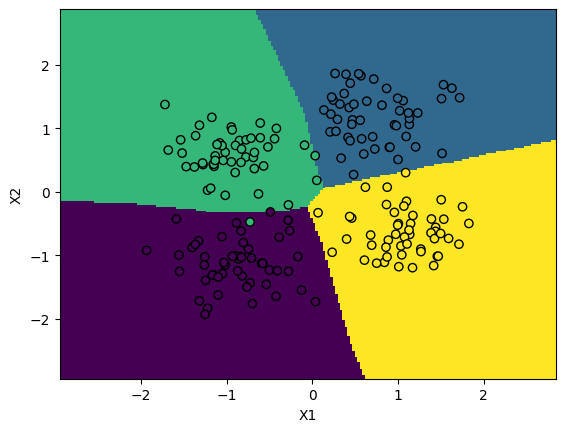

In [39]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 3 скрытых слоя

In [40]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.42355727
Iteration 2, loss = 1.41992316
Iteration 3, loss = 1.41633087
Iteration 4, loss = 1.41280887
Iteration 5, loss = 1.40926930
Iteration 6, loss = 1.40573985
Iteration 7, loss = 1.40221509
Iteration 8, loss = 1.39870138
Iteration 9, loss = 1.39516522
Iteration 10, loss = 1.39163046
Iteration 11, loss = 1.38807234
Iteration 12, loss = 1.38449475
Iteration 13, loss = 1.38089827
Iteration 14, loss = 1.37730066
Iteration 15, loss = 1.37367367
Iteration 16, loss = 1.37000866
Iteration 17, loss = 1.36634141
Iteration 18, loss = 1.36267493
Iteration 19, loss = 1.35898436
Iteration 20, loss = 1.35528015
Iteration 21, loss = 1.35157002
Iteration 22, loss = 1.34784274
Iteration 23, loss = 1.34410241
Iteration 24, loss = 1.34034446
Iteration 25, loss = 1.33656867
Iteration 26, loss = 1.33279193
Iteration 27, loss = 1.32899999
Iteration 28, loss = 1.32520796
Iteration 29, loss = 1.32143031
Iteration 30, loss = 1.31767512
Iteration 31, loss = 1.31391011
Iteration 32, los

In [41]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [42]:
clf.score(X_scaled, y)

0.99

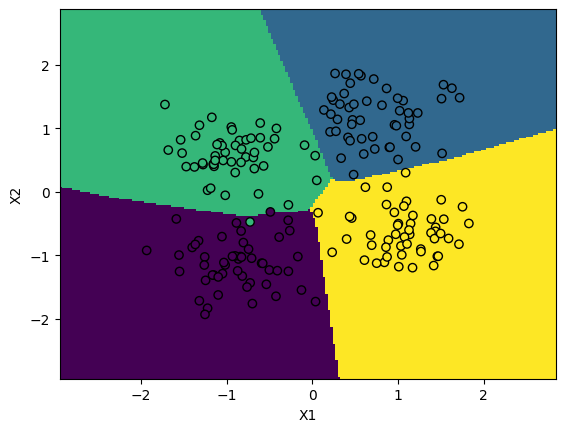

In [43]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 10 скрытых слоев

In [44]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.46003048
Iteration 2, loss = 1.45290097
Iteration 3, loss = 1.44650802
Iteration 4, loss = 1.44056700
Iteration 5, loss = 1.43494446
Iteration 6, loss = 1.42996171
Iteration 7, loss = 1.42610716
Iteration 8, loss = 1.42225626
Iteration 9, loss = 1.41991926
Iteration 10, loss = 1.41809764
Iteration 11, loss = 1.41653712
Iteration 12, loss = 1.41505322
Iteration 13, loss = 1.41364701
Iteration 14, loss = 1.41230611
Iteration 15, loss = 1.41100342
Iteration 16, loss = 1.40973064
Iteration 17, loss = 1.40847772
Iteration 18, loss = 1.40724235
Iteration 19, loss = 1.40601217
Iteration 20, loss = 1.40478549
Iteration 21, loss = 1.40355104
Iteration 22, loss = 1.40229455
Iteration 23, loss = 1.40103531
Iteration 24, loss = 1.39978412
Iteration 25, loss = 1.39854254
Iteration 26, loss = 1.39731298
Iteration 27, loss = 1.39621249
Iteration 28, loss = 1.39529895
Iteration 29, loss = 1.39454316
Iteration 30, loss = 1.39382866
Iteration 31, loss = 1.39297298
Iteration 32, los

In [45]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 0,  0, 50,  0],
       [ 0,  0,  0, 50]])

In [46]:
clf.score(X_scaled, y)

1.0

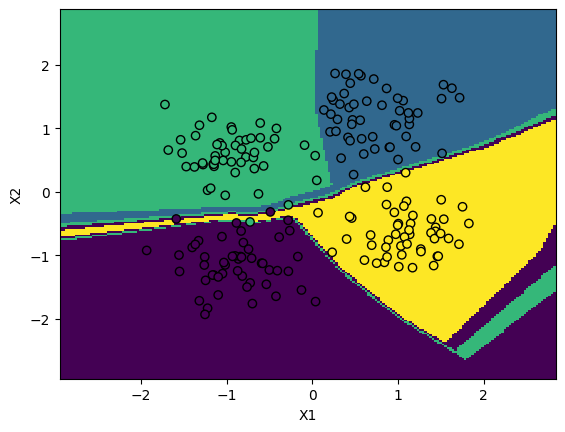

In [47]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [48]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.48472971
Iteration 2, loss = 1.47825474
Iteration 3, loss = 1.47186235
Iteration 4, loss = 1.46553894
Iteration 5, loss = 1.45928159
Iteration 6, loss = 1.45308832
Iteration 7, loss = 1.44695515
Iteration 8, loss = 1.44086024
Iteration 9, loss = 1.43481958
Iteration 10, loss = 1.42885293
Iteration 11, loss = 1.42294861
Iteration 12, loss = 1.41710071
Iteration 13, loss = 1.41133094
Iteration 14, loss = 1.40564155
Iteration 15, loss = 1.40001421
Iteration 16, loss = 1.39444768
Iteration 17, loss = 1.38894338
Iteration 18, loss = 1.38349574
Iteration 19, loss = 1.37809663
Iteration 20, loss = 1.37274478
Iteration 21, loss = 1.36741481
Iteration 22, loss = 1.36212295
Iteration 23, loss = 1.35687286
Iteration 24, loss = 1.35166183
Iteration 25, loss = 1.34647589
Iteration 26, loss = 1.34132165
Iteration 27, loss = 1.33620276
Iteration 28, loss = 1.33112764
Iteration 29, loss = 1.32608512
Iteration 30, loss = 1.32108033
Iteration 31, loss = 1.31609898
Iteration 32, los

In [49]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.12224014 -0.68979965], 
0 1 [-0.64961129 -0.07369519], 
0 2 [-0.32217307  0.69854206], 
0 3 [ 0.38505837 -0.06209455], 
0 4 [ 0.94138157 -0.4337161 ], 
0 5 [-0.51300515  0.82098388], 
0 6 [-0.78618485 -0.48448016], 
0 7 [-0.53548649  0.29784032], 
0 8 [ 0.53116321 -0.51625409], 
0 9 [-0.90884745 -0.67340694], 

1 0 [ 0.50296388 -0.06680014  0.00402379  0.2288055   0.65534821 -0.0033024
  0.64874676 -0.01745518 -0.02002053  0.71078313], 
1 1 [ 0.01433457  0.4161389   0.07910464 -0.17073026  0.54612053 -0.6168239
  0.6636176  -0.609701    0.88293161  0.38209612], 
1 2 [ 0.20665735 -0.24640792  0.28562619  0.63218917  0.43688655  0.07776896
 -0.85065312 -0.14165887 -0.16971687 -0.15653545], 
1 3 [ 0.9128369   0.22741273 -0.96681097  0.56402551  0.36345268 -0.94229764
 -0.20444314  0.36712974  0.26141262  0.0877307 ], 
1 4 [-0.41079919 -0.9561132   0.37044742  0.48995085  0.61662924 -0.00313308
 -0.1605689  -0.7656139   0.86079085 -0.62326839], 
1 5 [ 0.20795164  0.05460752 -0.1765

In [50]:
for i in range(len(clf.intercepts_)):
    print(clf.intercepts_[i])

[ 0.6069532   0.30959535  0.51129179  0.55951803  0.73522026  0.61770361
  0.92555941 -0.39517337  0.11207274 -0.36938135]
[ 0.29879513 -0.08205645  0.58816579  0.37430791  0.19554384 -0.035629
 -0.04878264  0.7121557   0.46284458  0.7327043 ]
[-0.140079    0.39833279  0.13235252  0.39101304 -0.32707555  0.03326406
 -0.12677114 -0.28482986  0.0146263   0.21800553]
[ 0.24068364 -0.17229052  0.27808342  0.76117256]


### 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [51]:
import time

In [52]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.69674083
Iteration 2, loss = 1.69128857
Iteration 3, loss = 1.68586160
Iteration 4, loss = 1.68045980
Iteration 5, loss = 1.67507919
Iteration 6, loss = 1.66971744
Iteration 7, loss = 1.66438082
Iteration 8, loss = 1.65907275
Iteration 9, loss = 1.65378887
Iteration 10, loss = 1.64853144
Iteration 11, loss = 1.64330074
Iteration 12, loss = 1.63809709
Iteration 13, loss = 1.63292532
Iteration 14, loss = 1.62778058
Iteration 15, loss = 1.62266799
Iteration 16, loss = 1.61758608
Iteration 17, loss = 1.61253647
Iteration 18, loss = 1.60751509
Iteration 19, loss = 1.60252134
Iteration 20, loss = 1.59755371
Iteration 21, loss = 1.59261400
Iteration 22, loss = 1.58770186
Iteration 23, loss = 1.58281663
Iteration 24, loss = 1.57795460
Iteration 25, loss = 1.57311639
Iteration 26, loss = 1.56830436
Iteration 27, loss = 1.56351845
Iteration 28, loss = 1.55875861
Iteration 29, loss = 1.55402454
Iteration 30, loss = 1.54931600
Iteration 31, loss = 1.54463355
Iteration 32, los

In [53]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.42088898
Iteration 2, loss = 1.39326395
Iteration 3, loss = 1.37037722
Iteration 4, loss = 1.34477648
Iteration 5, loss = 1.31949197
Iteration 6, loss = 1.29240400
Iteration 7, loss = 1.26183957
Iteration 8, loss = 1.22901792
Iteration 9, loss = 1.19352782
Iteration 10, loss = 1.15319974
Iteration 11, loss = 1.10692723
Iteration 12, loss = 1.05453036
Iteration 13, loss = 0.99526616
Iteration 14, loss = 0.92904157
Iteration 15, loss = 0.85473910
Iteration 16, loss = 0.77367498
Iteration 17, loss = 0.68766271
Iteration 18, loss = 0.59819594
Iteration 19, loss = 0.51121473
Iteration 20, loss = 0.42929003
Iteration 21, loss = 0.35463641
Iteration 22, loss = 0.28887971
Iteration 23, loss = 0.23207184
Iteration 24, loss = 0.18291069
Iteration 25, loss = 0.14133332
Iteration 26, loss = 0.10728156
Iteration 27, loss = 0.08210298
Iteration 28, loss = 0.06417551
Iteration 29, loss = 0.05137705
Iteration 30, loss = 0.04315545
Iteration 31, loss = 0.03804407
Iteration 32, los

### 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [54]:
from sklearn.datasets import load_iris

In [55]:
X, y = load_iris(return_X_y=True)

In [56]:
X_scaled_iris = scaler.fit_transform(X)

In [57]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled_iris, y)

Iteration 1, loss = 1.09392487
Iteration 2, loss = 1.08757919
Iteration 3, loss = 1.08137516
Iteration 4, loss = 1.07529309
Iteration 5, loss = 1.06940449
Iteration 6, loss = 1.06360953
Iteration 7, loss = 1.05789938
Iteration 8, loss = 1.05223470
Iteration 9, loss = 1.04657108
Iteration 10, loss = 1.04089310
Iteration 11, loss = 1.03525669
Iteration 12, loss = 1.02964562
Iteration 13, loss = 1.02409239
Iteration 14, loss = 1.01854246
Iteration 15, loss = 1.01297804
Iteration 16, loss = 1.00745311
Iteration 17, loss = 1.00192325
Iteration 18, loss = 0.99637817
Iteration 19, loss = 0.99081339
Iteration 20, loss = 0.98527984
Iteration 21, loss = 0.97969469
Iteration 22, loss = 0.97409846
Iteration 23, loss = 0.96852099
Iteration 24, loss = 0.96298422
Iteration 25, loss = 0.95747162
Iteration 26, loss = 0.95196061
Iteration 27, loss = 0.94641832
Iteration 28, loss = 0.94086444
Iteration 29, loss = 0.93529379
Iteration 30, loss = 0.92970722
Iteration 31, loss = 0.92411515
Iteration 32, los

In [58]:
confusion_matrix(y, clf.predict(X_scaled_iris))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

### 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [59]:
from sklearn.datasets import load_diabetes

In [60]:
diabets = load_diabetes()

In [61]:
features = diabets.data

In [62]:
data = pd.DataFrame(features, columns = diabets.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [63]:
X_diabetes, y_diabetes = diabets.data, diabets.target

In [64]:
X_diabetes.shape

(442, 10)

In [65]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

In [66]:
clf = MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=10_000, verbose=True).fit(X_diabetes_scaled, y_diabetes)

Iteration 1, loss = 5.38602771
Iteration 2, loss = 5.37580354
Iteration 3, loss = 5.36718222
Iteration 4, loss = 5.35950030
Iteration 5, loss = 5.35199372
Iteration 6, loss = 5.34469329
Iteration 7, loss = 5.33756903
Iteration 8, loss = 5.33054734
Iteration 9, loss = 5.32358881
Iteration 10, loss = 5.31641394
Iteration 11, loss = 5.30935047
Iteration 12, loss = 5.30201533
Iteration 13, loss = 5.29468078
Iteration 14, loss = 5.28700676
Iteration 15, loss = 5.27928116
Iteration 16, loss = 5.27123073
Iteration 17, loss = 5.26302087
Iteration 18, loss = 5.25465349
Iteration 19, loss = 5.24561993
Iteration 20, loss = 5.23644937
Iteration 21, loss = 5.22701430
Iteration 22, loss = 5.21718129
Iteration 23, loss = 5.20668524
Iteration 24, loss = 5.19633186
Iteration 25, loss = 5.18559976
Iteration 26, loss = 5.17372024
Iteration 27, loss = 5.16247844
Iteration 28, loss = 5.15077668
Iteration 29, loss = 5.13881904
Iteration 30, loss = 5.12657363
Iteration 31, loss = 5.11378796
Iteration 32, los

In [67]:
confusion_matrix(y_diabetes, clf.predict(X_diabetes_scaled))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(214, 214))

In [68]:
clf.score(X_diabetes_scaled, y_diabetes)

0.8733031674208145